
# <span style="color:rgb(213,80,0)">exercise5\_restoration\_newyork.m</span>

Exercise 5 – Image Restoration / Deconvolution

<pre>
Part A: Add Gaussian noise (SNR = 10 dB) and remove with Wiener filter
         (1) WITH KNOWN noise power                     → scalar Wiener
         (2) WITHOUT knowledge of noise power (wiener2)
</pre>
<pre>
Part B: Unknown blur via psf.p  → compute PSF, apply inverse filter
        with threshold, plot MSE-vs-threshold curve.
</pre>

Author: ANGELOS NIKOLAOS POTAMIANOS Date : MAY 2025


In [1]:
clear; close all; clc;

## \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\- Paths & parameters \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [2]:
imgPath    = fullfile('Images','Ασκηση 5','new_york.png');
snr_dB     = 10;                % target SNR
winSize    = [3 3];             % window for wiener2
threshVals = logspace(-4,-1,15);% thresholds for inverse filter
save_results = true;            % flag to save result images

## \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-
## \-\-\-\-\-\-\-\-\- Define metrics and helper functions \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [3]:
mse_fn  = @(A,B) mean((A(:)-B(:)).^2);
psnr_fn = @(A,B) 10*log10(1/mse_fn(A,B));
ssim_fn = @(A,B) ssim(A, B);  % Structural Similarity Index

## ===================== PART A – Noise Removal ==========================

In [4]:
fprintf('Loading image from %s...\n', imgPath);

Loading image from Images\Ασκηση 5
ew_york.png...

In [5]:
I  = im2double(imread(imgPath));
if size(I,3)==3
    fprintf('Converting RGB to grayscale...\n');
    I = rgb2gray(I);
end

fprintf('\n--- PART A: Noise Removal with Wiener Filter ---\n');

--- PART A: Noise Removal with Wiener Filter ---

In [6]:
fprintf('Target SNR: %d dB\n', snr_dB);

Target SNR: 10 dB

In [7]:

% Calculate noise variance to achieve target SNR
signal_var = var(I(:));                       % signal power
noise_var  = signal_var / 10^(snr_dB/10);     % from SNR
fprintf('Signal variance: %.6f, Noise variance: %.6f\n', signal_var, noise_var);

Signal variance: 0.079997, Noise variance: 0.008000

In [8]:

% Add Gaussian noise
rng(42); % For reproducibility
noise = sqrt(noise_var) * randn(size(I));
I_noisy = I + noise;
I_noisy = min(max(I_noisy, 0), 1);  % Clip to valid range

% Verify actual SNR
actual_SNR = 10*log10(var(I(:))/var(noise(:)));
fprintf('Actual SNR: %.2f dB\n', actual_SNR);

Actual SNR: 10.00 dB

In [9]:

% Extract detailed region for zoomed view
detail_region = extract_detail_region(I, 0.15);
fprintf('Selected detail region: rows %d:%d, cols %d:%d\n', detail_region);

Selected detail region: rows 495:669, cols 879:1189

In [10]:

% -- (1) Wiener with known noise power (NSR) -----------------------------
fprintf('\nApplying Wiener filter with known noise-to-signal ratio...\n');

Applying Wiener filter with known noise-to-signal ratio...

In [11]:
K = noise_var / signal_var;          % NSR = N/S
fprintf('NSR (K): %.6f\n', K);

NSR (K): 0.100000

In [12]:

I_wien_K = I_noisy ./ (1 + K);       % scalar Wiener (H=1)

% -- (2) Wiener without knowledge of noise power (wiener2) ---------------
fprintf('\nApplying adaptive Wiener filter (wiener2) with window size %dx%d...\n', winSize);

Applying adaptive Wiener filter (wiener2) with window size 3x3...

In [13]:
I_wien_est = wiener2(I_noisy, winSize);  % estimates local variance

% Calculate metrics
mse_noisy = mse_fn(I, I_noisy);
psnr_noisy = psnr_fn(I, I_noisy);
ssim_noisy = ssim_fn(I, I_noisy);

mse_wien_K = mse_fn(I, I_wien_K);
psnr_wien_K = psnr_fn(I, I_wien_K);
ssim_wien_K = ssim_fn(I, I_wien_K);

mse_wien_est = mse_fn(I, I_wien_est);
psnr_wien_est = psnr_fn(I, I_wien_est);
ssim_wien_est = ssim_fn(I, I_wien_est);

% Display results in table format
fprintf('\n=== PART A - Results ===\n');

=== PART A - Results ===

In [14]:
fprintf('+----------------------+---------+------------+--------+\n');

+----------------------+---------+------------+--------+

In [15]:
fprintf('| Method               | MSE     | PSNR (dB)  | SSIM   |\n');

| Method               | MSE     | PSNR (dB)  | SSIM   |

In [16]:
fprintf('+----------------------+---------+------------+--------+\n');

+----------------------+---------+------------+--------+

In [17]:
fprintf('| Noisy image          | %.6f | %10.2f | %.4f |\n', mse_noisy, psnr_noisy, ssim_noisy);

| Noisy image          | 0.007280 |      21.38 | 0.5245 |

In [18]:
fprintf('| Wiener (known NSR)   | %.6f | %10.2f | %.4f |\n', mse_wien_K, psnr_wien_K, ssim_wien_K);

| Wiener (known NSR)   | 0.008987 |      20.46 | 0.5398 |

In [19]:
fprintf('| Wiener (unknown)     | %.6f | %10.2f | %.4f |\n', mse_wien_est, psnr_wien_est, ssim_wien_est);

| Wiener (unknown)     | 0.002746 |      25.61 | 0.7456 |

In [20]:
fprintf('+----------------------+---------+------------+--------+\n');

+----------------------+---------+------------+--------+

Saving Part A results...


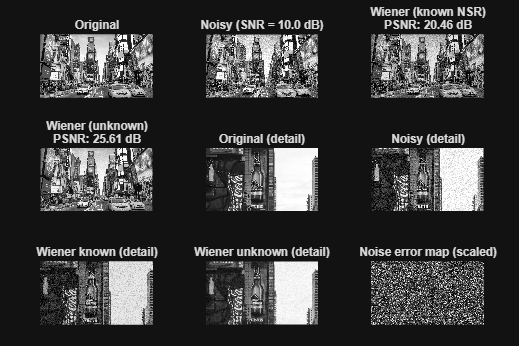

In [21]:

% Create comprehensive figure for Part A
figure('Name', 'Part A - Wiener Denoising', 'Position', [50, 50, 1200, 800]);
tiledlayout(3, 3, 'Padding', 'compact', 'TileSpacing', 'compact');

% Original and noisy images
ax1 = nexttile; imshow(I); title('Original');
ax2 = nexttile; imshow(I_noisy); title(sprintf('Noisy (SNR = %.1f dB)', actual_SNR));

% Results of different methods
ax3 = nexttile; imshow(I_wien_K); title(sprintf('Wiener (known NSR)\nPSNR: %.2f dB', psnr_wien_K));
ax4 = nexttile; imshow(I_wien_est); title(sprintf('Wiener (unknown)\nPSNR: %.2f dB', psnr_wien_est));

% Zoomed regions
ax5 = nexttile;
imshow(I(detail_region(1):detail_region(2), detail_region(3):detail_region(4)));
title('Original (detail)');

ax6 = nexttile;
imshow(I_noisy(detail_region(1):detail_region(2), detail_region(3):detail_region(4)));
title('Noisy (detail)');

ax7 = nexttile;
imshow(I_wien_K(detail_region(1):detail_region(2), detail_region(3):detail_region(4)));
title('Wiener known (detail)');

ax8 = nexttile;
imshow(I_wien_est(detail_region(1):detail_region(2), detail_region(3):detail_region(4)));
title('Wiener unknown (detail)');

% Error maps (scaled for visibility)
ax9 = nexttile;
error_scale = 5; % Scale factor to make errors more visible
imshow(error_scale * abs(I - I_noisy));
title('Noise error map (scaled)');

% Save results if requested
if save_results
    fprintf('\nSaving Part A results...\n');
    saveas(gcf, 'newyork_wiener_denoising.png');
    imwrite(I_wien_K, 'newyork_wiener_known.png');
    imwrite(I_wien_est, 'newyork_wiener_unknown.png');
end

## ================ PART B – Blur & Inverse Filter ======================

In [22]:
fprintf('\n--- PART B: Deblurring with Inverse Filter ---\n');

--- PART B: Deblurring with Inverse Filter ---

In [23]:

% 1) Estimate PSF (impulse response)
% Add the directory containing psf.p to the path
psfDir = fileparts(imgPath);
addpath(psfDir);
fprintf('Estimating Point Spread Function (PSF)...\n');

Estimating Point Spread Function (PSF)...


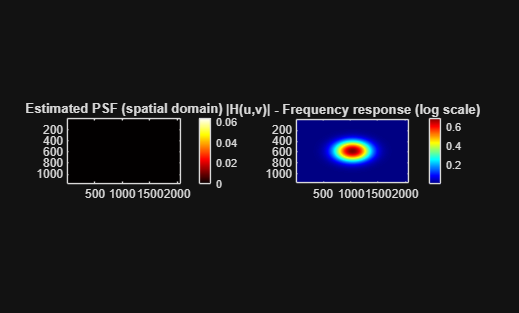

In [24]:
imp = zeros(size(I));
imp(ceil(end/2), ceil(end/2)) = 1;  % Delta function at center
PSF = psf(imp);                     % Call psf.p
PSF = PSF / sum(PSF(:));            % Normalize

% Display |H| - transfer function
H = fftshift(fft2(PSF));
figure('Name', 'PSF Analysis');
subplot(1,2,1);
imagesc(PSF); axis image; colormap(gca, 'hot'); colorbar;
title('Estimated PSF (spatial domain)');

subplot(1,2,2);
imagesc(log(1+abs(H))); axis image; colormap(gca, 'jet'); colorbar;
title('|H(u,v)| - Frequency response (log scale)');

In [25]:

% 2) Add blur and noise
fprintf('Applying blur and adding noise...\n');

Applying blur and adding noise...

In [26]:
I_blur = psf(I);
I_blurN = min(max(I_blur + sqrt(noise_var)*randn(size(I)), 0), 1);

% Calculate metrics for blurred images
mse_blur = mse_fn(I, I_blur);
psnr_blur = psnr_fn(I, I_blur);
ssim_blur = ssim_fn(I, I_blur);

mse_blurN = mse_fn(I, I_blurN);
psnr_blurN = psnr_fn(I, I_blurN);
ssim_blurN = ssim_fn(I, I_blurN);

fprintf('\nBlur only: MSE = %.6f, PSNR = %.2f dB, SSIM = %.4f\n',mse_blur, psnr_blur, ssim_blur);

Blur only: MSE = 6.484269, PSNR = -8.12 dB, SSIM = 0.1815

In [27]:
fprintf('Blur + Noise: MSE = %.6f, PSNR = %.2f dB, SSIM = %.4f\n',mse_blurN, psnr_blurN, ssim_blurN);

Blur + Noise: MSE = 0.270149, PSNR = 5.68 dB, SSIM = 0.2871

In [28]:

% 3) Apply inverse filter with threshold
fprintf('\nApplying inverse filter with different thresholds...\n');

Applying inverse filter with different thresholds...


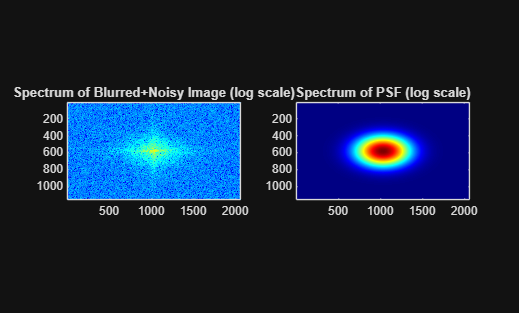

In [29]:
[M, N] = size(I);
Hf = fft2(PSF, M, N);
F_blur = fft2(I_blurN);

% Create figure to show frequency spectra
figure('Name', 'Frequency Domain Analysis');
subplot(1,2,1);
imagesc(log(1+abs(fftshift(F_blur)))); axis image; colormap(gca, 'jet');
title('Spectrum of Blurred+Noisy Image (log scale)');

subplot(1,2,2);
imagesc(log(1+abs(fftshift(Hf)))); axis image; colormap(gca, 'jet');
title('Spectrum of PSF (log scale)');

In [30]:

% Arrays to store results
mse_vec = zeros(size(threshVals));
psnr_vec = zeros(size(threshVals));
ssim_vec = zeros(size(threshVals));
restored_images = cell(numel(threshVals), 1);

% Apply inverse filter with different thresholds
for t = 1:numel(threshVals)
    T = threshVals(t);
    fprintf('Processing threshold %.1e (%d/%d)...\n', T, t, numel(threshVals));

    % Create mask for frequencies above threshold
    H_inv = zeros(size(Hf));
    mask = abs(Hf) >= T;
    H_inv(mask) = 1 ./ Hf(mask);

    % Apply inverse filter
    F_hat = F_blur .* H_inv;
    I_hat = real(ifft2(F_hat));
    I_hat = min(max(I_hat, 0), 1);  % Clip to valid range

    % Calculate metrics
    mse_vec(t) = mse_fn(I, I_hat);
    psnr_vec(t) = psnr_fn(I, I_hat);
    ssim_vec(t) = ssim_fn(I, I_hat);

    % Store image for later display
    restored_images{t} = I_hat;
end

Processing threshold 1.0e-04 (1/15)...
Processing threshold 1.6e-04 (2/15)...
Processing threshold 2.7e-04 (3/15)...
Processing threshold 4.4e-04 (4/15)...
Processing threshold 7.2e-04 (5/15)...
Processing threshold 1.2e-03 (6/15)...
Processing threshold 1.9e-03 (7/15)...
Processing threshold 3.2e-03 (8/15)...
Processing threshold 5.2e-03 (9/15)...
Processing threshold 8.5e-03 (10/15)...
Processing threshold 1.4e-02 (11/15)...
Processing threshold 2.3e-02 (12/15)...
Processing threshold 3.7e-02 (13/15)...
Processing threshold 6.1e-02 (14/15)...
Processing threshold 1.0e-01 (15/15)...

In [31]:

% Find optimal threshold
[min_mse, idx_mse] = min(mse_vec);
[max_psnr, idx_psnr] = max(psnr_vec);
[max_ssim, idx_ssim] = max(ssim_vec);

fprintf('\n=== PART B - Optimal Thresholds ===\n');

=== PART B - Optimal Thresholds ===

In [32]:
fprintf('Based on MSE:  T_opt = %.2e, MSE = %.6f, PSNR = %.2f dB, SSIM = %.4f\n',threshVals(idx_mse), min_mse, psnr_vec(idx_mse), ssim_vec(idx_mse));

Based on MSE:  T_opt = 5.18e-03, MSE = 0.290177, PSNR = 5.37 dB, SSIM = 0.0139

In [33]:
fprintf('Based on PSNR: T_opt = %.2e, MSE = %.6f, PSNR = %.2f dB, SSIM = %.4f\n',threshVals(idx_psnr), mse_vec(idx_psnr), max_psnr, ssim_vec(idx_psnr));

Based on PSNR: T_opt = 5.18e-03, MSE = 0.290177, PSNR = 5.37 dB, SSIM = 0.0139

In [34]:
fprintf('Based on SSIM: T_opt = %.2e, MSE = %.6f, PSNR = %.2f dB, SSIM = %.4f\n',threshVals(idx_ssim), mse_vec(idx_ssim), psnr_vec(idx_ssim), max_ssim);

Based on SSIM: T_opt = 1.00e-01, MSE = 0.317764, PSNR = 4.98 dB, SSIM = 0.1608


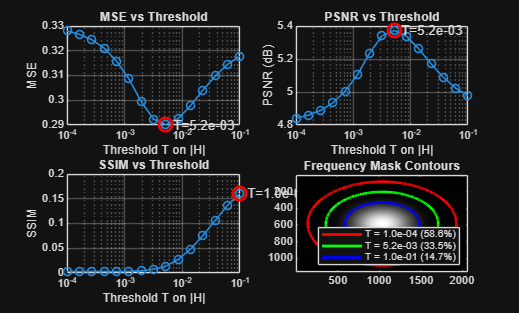

In [35]:

% 4) Plot MSE vs threshold curve
figure('Name', 'Inverse Filter Performance Curves');
subplot(2,2,1);
semilogx(threshVals, mse_vec, '-o', 'LineWidth', 1.2, 'MarkerSize', 6);
xlabel('Threshold T on |H|'); ylabel('MSE');
title('MSE vs Threshold');
grid on;
hold on;
plot(threshVals(idx_mse), min_mse, 'ro', 'MarkerSize', 10, 'LineWidth', 2);
text(threshVals(idx_mse), min_mse, sprintf('  T=%.1e', threshVals(idx_mse)), 'FontSize', 10);

subplot(2,2,2);
semilogx(threshVals, psnr_vec, '-o', 'LineWidth', 1.2, 'MarkerSize', 6);
xlabel('Threshold T on |H|'); ylabel('PSNR (dB)');
title('PSNR vs Threshold');
grid on;
hold on;
plot(threshVals(idx_psnr), max_psnr, 'ro', 'MarkerSize', 10, 'LineWidth', 2);
text(threshVals(idx_psnr), max_psnr, sprintf('  T=%.1e', threshVals(idx_psnr)), 'FontSize', 10);

subplot(2,2,3);
semilogx(threshVals, ssim_vec, '-o', 'LineWidth', 1.2, 'MarkerSize', 6);
xlabel('Threshold T on |H|'); ylabel('SSIM');
title('SSIM vs Threshold');
grid on;
hold on;
plot(threshVals(idx_ssim), max_ssim, 'ro', 'MarkerSize', 10, 'LineWidth', 2);
text(threshVals(idx_ssim), max_ssim, sprintf('  T=%.1e', threshVals(idx_ssim)), 'FontSize', 10);

% Display mask examples at different thresholds
subplot(2,2,4);
T_examples = [threshVals(1), threshVals(idx_mse), threshVals(end)];
colors = {'r', 'g', 'b'};
legends = cell(1, length(T_examples));

for i = 1:length(T_examples)
    T = T_examples(i);
    mask = abs(Hf) >= T;
    legends{i} = sprintf('T = %.1e (%.1f%%)', T, 100*sum(mask(:))/numel(mask));

    % Show contours of the mask
    if i == 1
        imagesc(log(1+abs(fftshift(Hf)))); axis image; colormap(gca, 'gray');
        hold on;
    end

    [~, contourObj] = contour(fftshift(mask), [0.5 0.5], colors{i}, 'LineWidth', 2);
end

title('Frequency Mask Contours');
legend(legends, 'Location', 'southeast');

% Save the performance curves
if save_results
    saveas(gcf, 'newyork_inverse_filter_performance.png');
end

Saving Part B results...


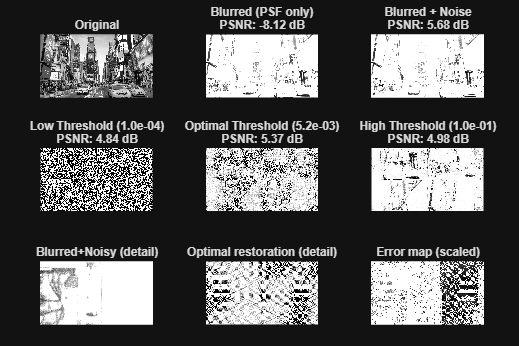

In [36]:

% Display representative restored images
figure('Name', 'Inverse Filter Results', 'Position', [50, 50, 1200, 800]);
tiledlayout(3, 3, 'Padding', 'compact', 'TileSpacing', 'compact');

% Original, blurred and blurred+noisy images
ax1 = nexttile; imshow(I); title('Original');
ax2 = nexttile; imshow(I_blur);
title(sprintf('Blurred (PSF only)\nPSNR: %.2f dB', psnr_blur));
ax3 = nexttile; imshow(I_blurN);
title(sprintf('Blurred + Noise\nPSNR: %.2f dB', psnr_blurN));

% Show results for low, optimal, and high thresholds
idx_low = 1;  % Low threshold
idx_opt = idx_psnr;  % Optimal threshold (based on PSNR)
idx_high = numel(threshVals);  % High threshold

ax4 = nexttile; imshow(restored_images{idx_low});
title(sprintf('Low Threshold (%.1e)\nPSNR: %.2f dB', threshVals(idx_low), psnr_vec(idx_low)));

ax5 = nexttile; imshow(restored_images{idx_opt});
title(sprintf('Optimal Threshold (%.1e)\nPSNR: %.2f dB', threshVals(idx_opt), psnr_vec(idx_opt)));

ax6 = nexttile; imshow(restored_images{idx_high});
title(sprintf('High Threshold (%.1e)\nPSNR: %.2f dB', threshVals(idx_high), psnr_vec(idx_high)));

% Show zoomed regions for detail comparison
ax7 = nexttile;
imshow(I_blurN(detail_region(1):detail_region(2), detail_region(3):detail_region(4)));
title('Blurred+Noisy (detail)');

ax8 = nexttile;
imshow(restored_images{idx_opt}(detail_region(1):detail_region(2), detail_region(3):detail_region(4)));
title('Optimal restoration (detail)');

ax9 = nexttile;
error_img = abs(I - restored_images{idx_opt});
imshow(error_scale * error_img(detail_region(1):detail_region(2), detail_region(3):detail_region(4)));
title('Error map (scaled)');

% Save the final results
if save_results
    fprintf('\nSaving Part B results...\n');
    saveas(gcf, 'newyork_inverse_filter_results.png');
    imwrite(restored_images{idx_opt}, 'newyork_restored_optimal.png');
    imwrite(restored_images{idx_low}, 'newyork_restored_low_threshold.png');
    imwrite(restored_images{idx_high}, 'newyork_restored_high_threshold.png');
end

In [37]:

fprintf('\n=== Analysis of Results ===\n');

=== Analysis of Results ===

In [38]:
fprintf('1. Without thresholding (T→0): The inverse filter amplifies noise,\n');

1. Without thresholding (T→0): The inverse filter amplifies noise,

In [39]:
fprintf('   especially at frequencies where |H| is small, leading to artifacts.\n\n');

   especially at frequencies where |H| is small, leading to artifacts.

In [40]:

fprintf('2. With optimal thresholding: The filter provides a good balance between\n');

2. With optimal thresholding: The filter provides a good balance between

In [41]:
fprintf('   sharpening (deblurring) and noise suppression.\n\n');

   sharpening (deblurring) and noise suppression.

In [42]:

fprintf('3. With high thresholding: Only the strongest frequency components pass\n');

3. With high thresholding: Only the strongest frequency components pass

In [43]:
fprintf('   through, reducing noise but leaving significant blur.\n\n');

   through, reducing noise but leaving significant blur.

In [44]:

fprintf('This demonstrates the classic trade-off in inverse filtering between\n');

This demonstrates the classic trade-off in inverse filtering between

In [45]:
fprintf('noise amplification and blur removal.\n');

noise amplification and blur removal.

## \-\-\-\-\-\-\-\-\- Helper function to extract detail region \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [46]:
function region = extract_detail_region(img, size_percent)
    % Find an interesting region with high variance (details)
    [h, w] = size(img);
    block_size = round([h, w] * size_percent);

    % Create non-overlapping blocks and find one with high variance
    blocks = im2col(img, block_size, 'distinct');
    [~, max_idx] = max(var(blocks));

    % Convert index to row/col coordinates
    blocks_per_row = floor(w / block_size(2));
    row_idx = floor(max_idx / blocks_per_row) + 1;
    col_idx = mod(max_idx, blocks_per_row);
    if col_idx == 0
        col_idx = blocks_per_row;
        row_idx = row_idx - 1;
    end

    % Extract region
    r_start = max(1, (row_idx-1) * block_size(1) + 1);
    c_start = max(1, (col_idx-1) * block_size(2) + 1);
    r_end = min(r_start + block_size(1) - 1, h);
    c_end = min(c_start + block_size(2) - 1, w);

    % Ensure r_start < r_end and c_start < c_end
    if r_start >= r_end || c_start >= c_end
        % Fallback to center of image if calculated region is invalid
        r_center = round(h/2);
        c_center = round(w/2);
        r_start = max(1, r_center - round(h * size_percent/2));
        r_end = min(h, r_center + round(h * size_percent/2));
        c_start = max(1, c_center - round(w * size_percent/2));
        c_end = min(w, c_center + round(w * size_percent/2));
    end

region = [r_start, r_end, c_start, c_end];
end